In [ ]:
!pip install langchain langchain-chroma langchain-openai

In [ ]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()
os.environ["OPENAI_API_KEY"] = getpass.getpass()

In [ ]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Dogs are great companions, known for their loyalty and friendliness.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Cats are independent pets that often enjoy their own space.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Goldfish are popular pets for beginners, requiring relatively simple care.",
        metadata={"source": "fish-pets-doc"},
    ),
    Document(
        page_content="Parrots are intelligent birds capable of mimicking human speech.",
        metadata={"source": "bird-pets-doc"},
    ),
    Document(
        page_content="Rabbits are social animals that need plenty of space to hop around.",
        metadata={"source": "mammal-pets-doc"},
    ),
]

Vector search is a common way to store and search over unstructured data (such as unstructured text). The idea is to store numeric vectors that are associated with the text.

Given a query, we can embed it as a vector of the same dimension and use vector similarity metrics to identify related data in the store.

Vector stores:

 - Can be hosted by a provider (e.g., various cloud providers) and require specific credentials to use
 - Can  run in separate infrastructure that can be run locally or via a third-party (such as Postgres)
 -  Can run in-memory for lightweight workloads.


Here we will demonstrate usage of LangChain VectorStores using Chroma, which includes an in-memory implementation.

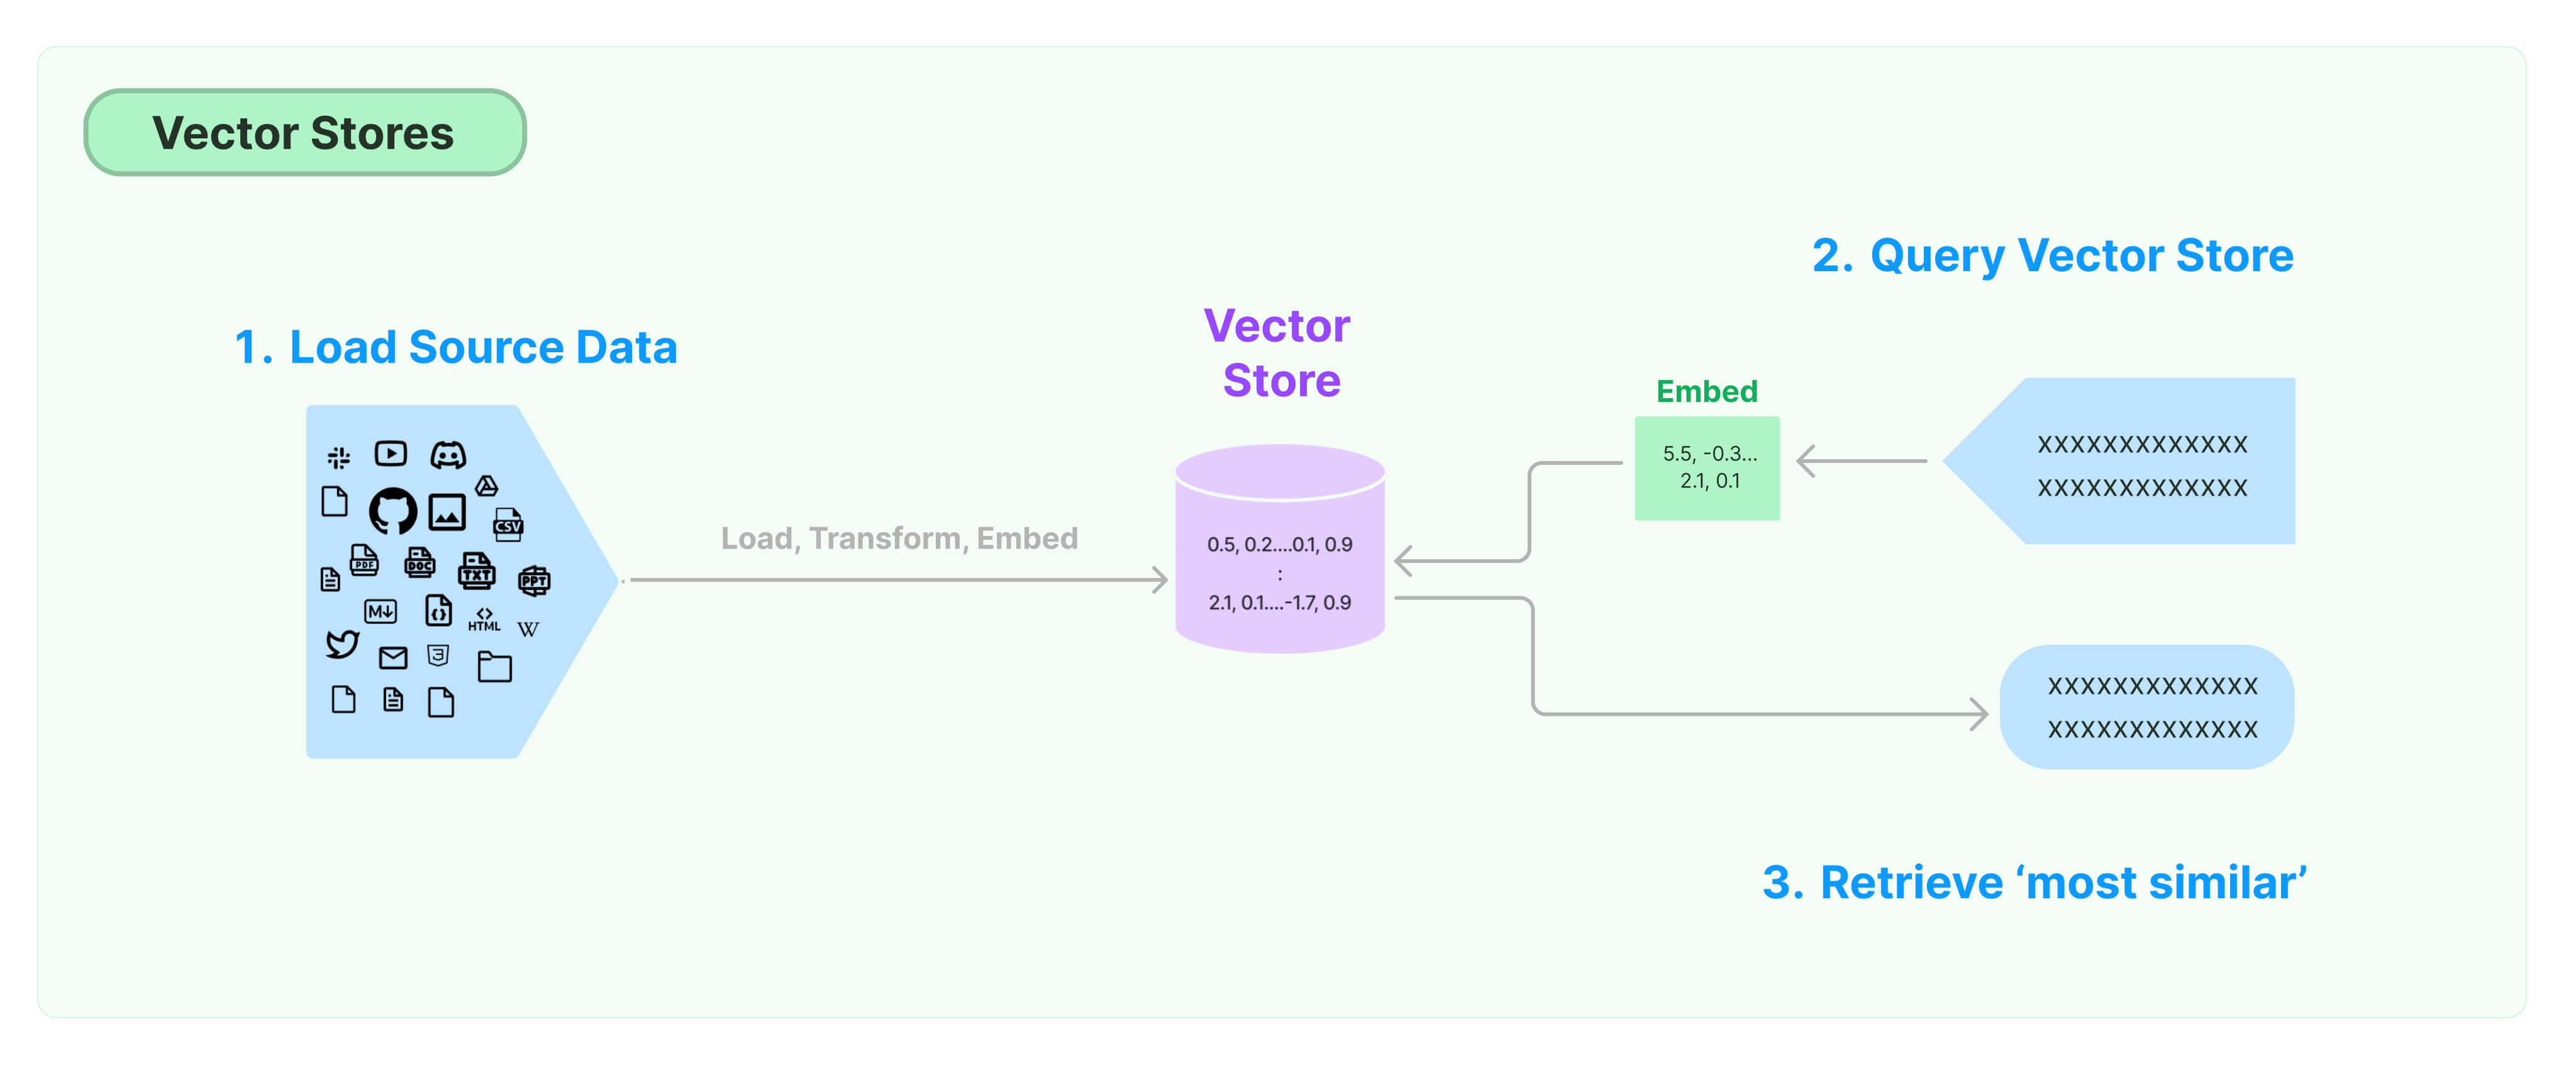

In [ ]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(
    documents,
    embedding=OpenAIEmbeddings(),
)

In [ ]:
vectorstore.similarity_search("cat")

[Document(page_content='Cats are independent pets that often enjoy their own space.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Dogs are great companions, known for their loyalty and friendliness.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Rabbits are social animals that need plenty of space to hop around.', metadata={'source': 'mammal-pets-doc'}),
 Document(page_content='Parrots are intelligent birds capable of mimicking human speech.', metadata={'source': 'bird-pets-doc'})]